# Summary of Data

The data is taken from an old Kaggle competition: [Tensorflow Speech Recognition Challenge](https://www.kaggle.com/c/tensorflow-speech-recognition-challenge/overview). The challenge is described as follows:

> TensorFlow recently released the Speech Commands Datasets. It includes *65,000 one-second long utterances of 30 short words*, by thousands of different people. In this competition, you're challenged to use the Speech Commands Dataset to build an algorithm that understands simple spoken commands. By improving the recognition accuracy of open-sourced voice interface tools, we can improve product effectiveness and their accessibility.

# Audio Processing

## Load and Plot Data

In [49]:
import os
import librosa
from scipy.io import wavfile
from scipy.signal import spectrogram
from librosa.display import specshow
from IPython.display import Audio
import matplotlib.pyplot as plt
import noisereduce as nr
import numpy as np
plt.style.use('seaborn')

In [71]:
yes_dir = 'train/audio/yes'
os.listdir(yes_dir)[:5]
sample_rate, samples = wavfile.read(os.path.join(yes_dir, os.listdir(yes_dir)[5]))
sample_rate, samples.shape

(16000, (16000,))

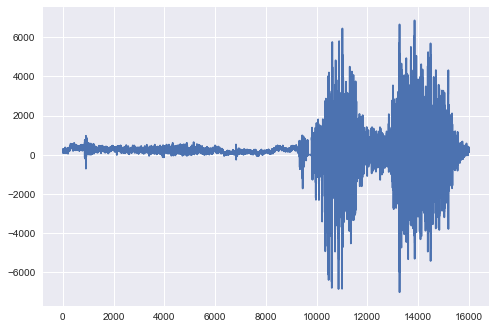

In [72]:
plt.plot(samples)

In [73]:
Audio(samples, rate=sample_rate)

It sounds like there is a lot of unnecessary silence and noise.

## Noise Reduction

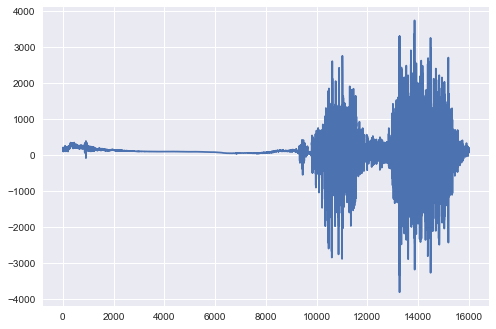

In [75]:
samples_nr = nr.reduce_noise(audio_clip=samples.astype(np.float32), noise_clip=samples.astype(np.float32), verbose=False)
plt.plot(samples_nr)

## Trimming

Let's listen to it to make sure it is still audible:

In [79]:
Audio(samples_trimmed, rate=sample_rate)

# Feature Extraction

The preprocessed files cannot be used directly for classification. To achieve this, we extract the spectrograms. Since this is quite a lot of files, I used multiprocessing.

In [86]:
import multiprocessing as mp
import worker

labels = os.listdir('train/audio')
save_dir = 'train_spectrograms'
os.mkdir(save_dir)

if __name__ ==  '__main__':
    pool = mp.Pool(mp.cpu_count()-1)
    pool.map(worker.worker, labels)